#### Exercise ####


#### Please refer to module 1 of SimpleRegression - SimpleLinear for Tasks 1-4
#### Task 1
##### Import the required packages.
##### Set the working directory to data directory.
##### Print the working directory.
#### Result:


In [39]:
import os
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt

main_dir = Path(os.getcwd())
home_dir = Path(".").resolve()
home_dir = main_dir.parent

data_dir = Path(str(main_dir) + '/data')

print(data_dir)
print(os.listdir(data_dir))

df = pd.read_csv(str(data_dir)+'/insurance.csv')


/home/jovyan/TEDS-Jul2022/2/data
['insurance.csv', '.ipynb_checkpoints', 'ChemicalManufacturingProcess.csv']


#### Task 2
##### Read in our dataset called `insurance.csv`. Save it as `ex_data`.
##### Print the head of `ex_data`.
##### Print the type and length of `ex_data`.
##### Save the shape of the DataFrame into two variables `nrow` and `ncol` and print them.
#### Result:


In [40]:
ex_data = df

In [41]:
ex_data = df.set_index('id')

print('length of df:',ex_data.shape[0])
print('type of df:', type(ex_data))

nrow,ncol = ex_data.shape

length of df: 1337
type of df: <class 'pandas.core.frame.DataFrame'>


#### Task 3
##### Subset two variables for single variable regression : `'age'` and `charges`.
##### Save the subset to a new variable `ex_regression` and print its head.
##### Print the summary statistics of both the variables in `ex_regression`.
#### Result:


In [42]:
ex_regression = df[['age','charges']]

print(ex_regression.head())

print(ex_regression.describe())

   age      charges
0   19  16884.92400
1   18   1725.55230
2   28   4449.46200
3   33  21984.47061
4   32   3866.85520
               age       charges
count  1337.000000   1337.000000
mean     39.222139  13279.121487
std      14.044333  12110.359656
min      18.000000   1121.873900
25%      27.000000   4746.344000
50%      39.000000   9386.161300
75%      51.000000  16657.717450
max      64.000000  63770.428010


#### Task 4
##### Find the covariance between the variables in the insurance.csv. Is it useful to determine their relationship?
##### Calculate the correlation of `ex_regression` and save it as a correlation matrix `ex_cor`.
#### Result:


In [43]:
ex_data.cov()

,age,bmi,children,charges
age,197.243282,9.368233,0.703268,5.073683e+04
bmi,9.368233,37.215715,0.093805,1.465763e+04
children,0.703268,0.093805,1.453402,9.838780e+02
charges,50736.833698,14657.628526,983.878025,1.466608e+08


In [44]:
ex_corr = ex_regression.corr()
ex_corr

,age,charges
age,1.000000,0.298308
charges,0.298308,1.000000


#### Please refer to module 2 of SimpleRegression - SimpleLinear for Tasks 5-7
#### Task 5
##### We will be predicting `charges`,which makes it our target variable (y) , and we will use `'age'`.
##### Create a scatter plot of the two variables using the `matplotlib` package.
##### Create histograms for each variable.
#### Result:


age        0
charges    0
dtype: int64


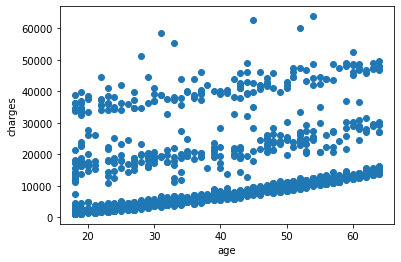

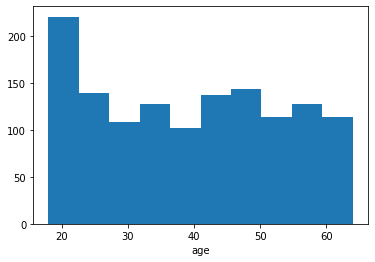

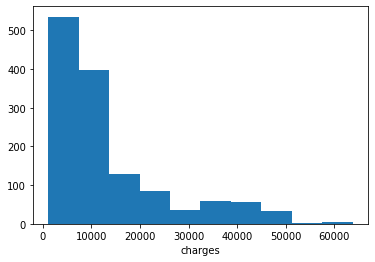

In [45]:
import matplotlib.pyplot as plt
print(ex_regression.isna().sum())

plt.scatter(ex_regression['age'],ex_regression['charges'])
plt.xlabel('age')
plt.ylabel('charges')
plt.show()
plt.close()

plt.hist(ex_regression['age'])
plt.xlabel('age')
plt.show()
plt.close()




plt.hist(ex_regression['charges'])
plt.xlabel('charges')
plt.show()
plt.close()



#### Task 6
##### Check the  number of NAs in `'age'` and `charges`.
##### Print the rows for each  variable that have NAs.
##### Impute the NAs with mean if needed.
#### Result:


In [46]:
# checking for NAs was done in the above cell
# there are no NA values to remove/fill

for x in ex_regression:
    mean_val = ex_regression[x].mean()
    ex_data[x].fillna(mean_val)

#### Task 7
##### Instantiate the `VarianceThreshold` function to look for low variance within the columns.
##### Name the cleaned dataset `ex_regression_clean` and check its dimensions.
#### Result:


In [47]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
ex_regression_clean = selector.fit_transform(ex_regression)
print(ex_regression.shape)
print(ex_regression_clean.shape)



(1337, 2)
(1337, 2)


#### Please refer to module 3 of SimpleRegression - SimpleLinear for Tasks 8-13
#### Task 8
##### Create two DataFrames, `X` and `Y` , with `X` having the independent variable `'age'`,
##### and `Y` the dependent variable `charges`.
##### Add the constant term for the intercept to `X`.
#### Result:


In [48]:
import statsmodels.api as sm

Y = pd.DataFrame(ex_regression['charges'].fillna(ex_regression['charges'].mean()))
X = pd.DataFrame(ex_regression['age'].fillna(ex_regression['age'].mean()))
X = sm.add_constant(X)

X

,const,age
0,1.0,19
1,1.0,18
2,1.0,28
3,1.0,33
4,1.0,32
...,...,...
1332,1.0,50
1333,1.0,18
1334,1.0,18
1335,1.0,21


#### Task 9
##### Set the random seed to 1 using the `np.random.seed()` function.
##### Implement the linear model using `sm.OLS()`. Save the model to `ex_model`.
##### Print the model summary of `ex_model`.
#### Result:


In [49]:
# Build the model.
ex_model = sm.OLS(Y, X).fit()
print(ex_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     130.4
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           6.98e-29
Time:                        15:57:49   Log-Likelihood:                -14405.
No. Observations:                1337   AIC:                         2.881e+04
Df Residuals:                    1335   BIC:                         2.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3190.0217    938.396      3.399      0.0

#### Task 10
##### Add the linear model to the scatter plot we created before using `abline_plot`.
##### Implement the scatter plot. 
#### Result:


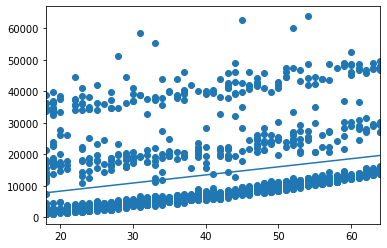

In [50]:
fig = sm.graphics.abline_plot(model_results = ex_model)
ax = fig.axes[0]

plt.scatter(X['age'],Y['charges'])




#### Task 11
##### Inspect the results of the model.
#### Result:


In [51]:
# There appears to be clustering of sorts. 3 distinct groupings

#### Task 12
##### Find the residual standard error of the model `ex_model`.
#### Result:


In [52]:
print(np.sqrt(ex_model.scale))


11563.29848467114


#### Task 13
##### What is the R-squared in our model? 
#### Result:


In [53]:
print(ex_model.rsquared)

0.08898778965078402


#### Please refer to module 4 of SimpleRegression - SimpleLinear for Tasks 14-20
#### Task 14
##### Find the fitted values from our linear model and save it to `ex_fitted`. Print its head.
##### Find the residuals similarly and save it to `ex_residuals`. 
#### Result:


In [54]:
ex_fitted = ex_model.fittedvalues
ex_fitted.head()


0     8077.386354
1     7820.156636
2    10392.453812
3    11678.602399
4    11421.372682
dtype: float64

In [55]:
ex_residuals = ex_model.resid
print(ex_residuals)

0        8807.537646
1       -6094.604336
2       -5942.991812
3       10305.868211
4       -7554.517482
            ...     
1332    -5450.959297
1333    -5614.175836
1334    -6190.323136
1335    -6583.900789
1336    10260.325810
Length: 1337, dtype: float64


#### Task 15
##### Import `seaborn` package as `sns`.
##### Plot the residuals against the fitted values to test that the relationship between the predictor and response variable is linear.
#### Result:


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Residuals based on Fitted values from Age vs Charges Data')

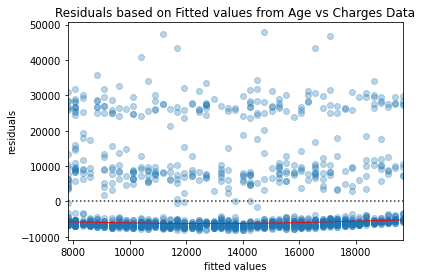

In [56]:
import seaborn as sns

sns.residplot(ex_fitted, 'charges', 
                    data=ex_data, 
                    lowess = True, 
                    scatter_kws = {'alpha': 0.3},
                    line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.9})

#sns.scatterplot(x = ex_fitted, y = ex_residuals)
plt.xlabel('fitted values')
plt.ylabel('residuals')

plt.title('Residuals based on Fitted values from Age vs Charges Data')

#### Task 16
##### Test that the residuals are normally distributed.
##### Create a plot using `ProbPlot`.
#### Result:


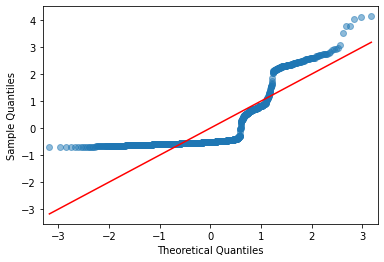

In [57]:
from statsmodels.graphics.gofplots import ProbPlot

model_norm_residuals = ex_model.get_influence().resid_studentized_internal
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line= 's', alpha = 0.5, color = '#4C72B0', lw = 1)


#### Task 17
##### Test that the residuals have equal variance.
#### Result:


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

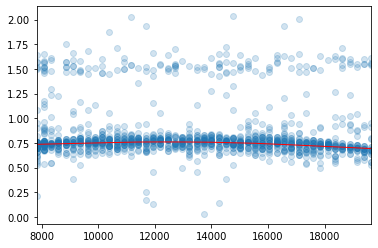

In [58]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plt.scatter(ex_fitted, model_norm_residuals_abs_sqrt, alpha = 0.2)

sns.regplot(ex_fitted, model_norm_residuals_abs_sqrt,
            scatter = False, 
            ci = False, 
            lowess = True,
            line_kws = {'color': 'red', 'lw': 1, 'alpha': 1})

#### Task 18
##### Test our data for outliers using `statsmodel.outlier_test()`. Save it to `ex_test`.
##### Save the final outliers to `ex_test_final`.
##### Remove the outliers from our original dataset and save the dataset as `ex_no_outliers`. 
##### Print the shape of the new dataset `ex_no_outliers`.
#### Result:


In [61]:
ex_test = ex_model.outlier_test(method='bonf', alpha=0.05)

print(ex_test)

print(ex_regression.shape)
bonf_p_col = ex_test['bonf(p)']
ex_test_final = ex_test[bonf_p_col < 0.05]
print(ex_test_final)
ex_no_outliers = ex_regression.drop(ex_test_final.index)
print(ex_no_outliers.shape)

      student_resid   unadj_p  bonf(p)
0          0.762438  0.445933      1.0
1         -0.527571  0.597885      1.0
2         -0.514127  0.607249      1.0
3          0.891587  0.372775      1.0
4         -0.653487  0.513555      1.0
...             ...       ...      ...
1332      -0.471545  0.637329      1.0
1333      -0.485975  0.627064      1.0
1334      -0.535858  0.592146      1.0
1335      -0.569807  0.568904      1.0
1336       0.888381  0.374496      1.0

[1337 rows x 3 columns]
(1337, 2)
      student_resid   unadj_p   bonf(p)
1299       4.163193  0.000033  0.044649
(1336, 2)


#### Task 19
##### Now try to rerun the model on this new dataset `ex_no_outliers`.
##### Once we slice a DataFrame, we cannot slice it again or change the values.
##### Hence, we separate the columns, `'age'` as `X2` and `charges` as `y2`, using the column names and convert it to a DataFrame.
#### Result:


In [73]:
X2 = ex_no_outliers['age']
Y2 = ex_no_outliers['charges']

X2 = sm.add_constant(X2)

ex_model_2 = sm.OLS(Y2,X2).fit()
print(ex_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     130.9
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           5.55e-29
Time:                        16:06:07   Log-Likelihood:                -14386.
No. Observations:                1336   AIC:                         2.878e+04
Df Residuals:                    1334   BIC:                         2.879e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3195.3850    932.709      3.426      0.0

#### Task 20
##### Evaluate the new model `ex_model2`. Does this model perform better than the previous one?
#### Result:


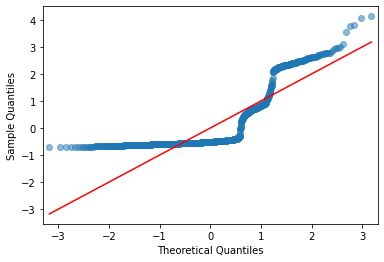

In [75]:
model_norm_residuals = ex_model_2.get_influence().resid_studentized_internal
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line= 's', alpha = 0.5, color = '#4C72B0', lw = 1)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='charges'>

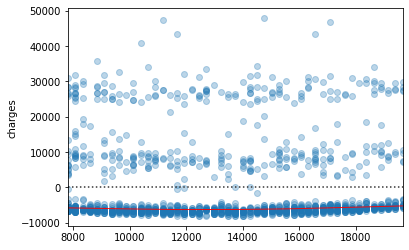

In [76]:
ex_fitted_2 = ex_model_2.fittedvalues
sns.residplot(ex_fitted, 'charges', 
                    data=ex_data, 
                    lowess = True, 
                    scatter_kws = {'alpha': 0.3},
                    line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.9})

The p value for the f-stat is greater, which makes this model not as good

The p values associated with the t statistic is about the same as the original model

The p value of the JB test is also low for both, but lower for the original plot, which shows that the residuals are better for the new model